In [56]:
import datetime as dt
import numpy as np
import scipy
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
import dbnomics

In [40]:
from fredapi import Fred
fred = Fred(api_key='b734fd1238bce67ed6007048827e4473')

In [41]:
data = {
    'population': {},
    'CPI': {},
    'GDP': {},
    'IR': {},
    'debt-to-GDP': {}
}

In [42]:
data['population']['US'] = fred.get_series('POPTHM')
data['population']['US'].index.min(), data['population']['US'].index.max()

(Timestamp('1959-01-01 00:00:00'), Timestamp('2023-03-01 00:00:00'))

In [64]:
gdp_capita = (data['GDP']['US']/data['population']['US']).dropna()

In [59]:
slope, intercept, r, p, se = scipy.stats.linregress(gdp_capita.index.map(dt.datetime.toordinal), gdp_capita, alternative='two-sided')

In [61]:
slope, intercept, r, p, se

(1.8497801687559906e-06,
 -1.3064076356861094,
 0.9950880104894076,
 3.8093500365975855e-258,
 1.1523868133252259e-08)

In [76]:
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x=gdp_capita.index, y=gdp_capita, name="real GDP/population"), row=1, col=1)
fig.add_trace(go.Scatter(x=gdp_capita.index, y=gdp_capita.index.map(dt.datetime.toordinal)*slope+intercept, name="linear regression"), row=1, col=1)
fig.show()

<AxesSubplot:>

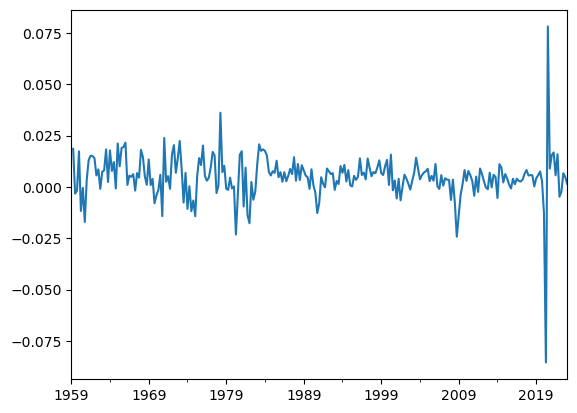

In [50]:
(data['GDP']['US']/data['population']['US']).dropna().pct_change().plot()

In [43]:
data['GDP']['US'] = fred.get_series('GDPC1')
data['GDP']['US'].index.min(), data['GDP']['US'].index.max()

(Timestamp('1947-01-01 00:00:00'), Timestamp('2023-01-01 00:00:00'))

In [26]:
sm.tsa.adfuller(data['GDP']['US'])

(2.9272334368360866,
 1.0,
 1,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 3681.133000522573)

<AxesSubplot:>

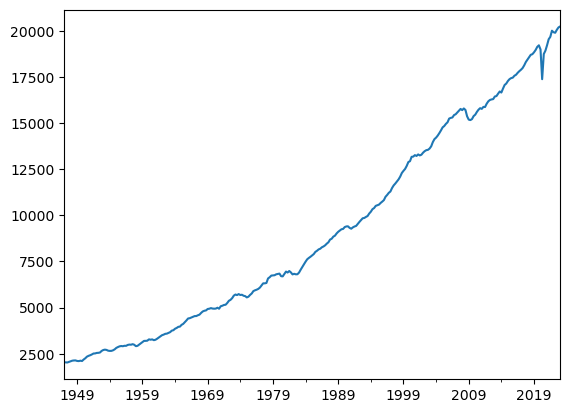

In [11]:
data['GDP']['US'].plot()

In [28]:
sm.tsa.adfuller(data['GDP']['US'].pct_change().dropna())

(-10.272025985041154,
 3.978561084060438e-18,
 1,
 302,
 {'1%': -3.4521902441030963,
  '5%': -2.871158406898617,
  '10%': -2.5718948388228586},
 -1764.1730919958045)

<AxesSubplot:>

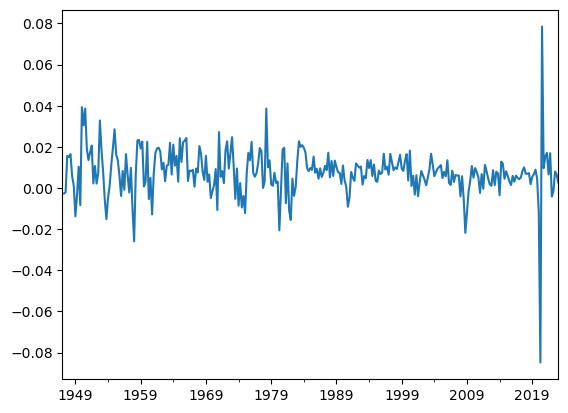

In [12]:
data['GDP']['US'].pct_change().plot()

<AxesSubplot:>

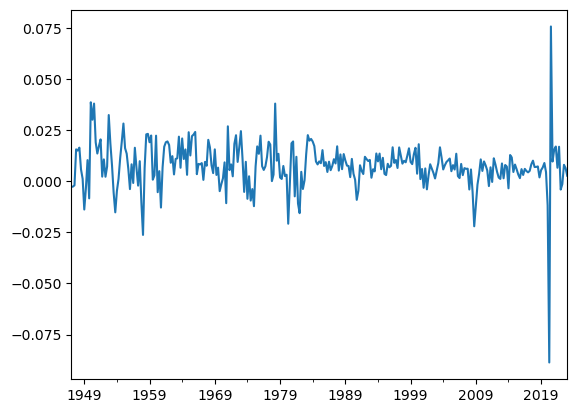

In [19]:
np.log(data['GDP']['US']/data['GDP']['US'].shift(1)).plot()

In [72]:
data['GDP']['EU'] = dbnomics.fetch_series("FAO","MK","6184.22008.5707")
data['GDP']['EU'] = data['GDP']['EU'].set_index('period')['value'].pct_change()
data['GDP']['EU'].index.min(), data['GDP']['EU'].index.max()

ValueError: Could not fetch data from URL 'https://api.db.nomics.world/v22/series/FAO/MK/6184.22008.5707?observations=1&offset=0' because: Series 'FAO/MK/6184.22008.5707' not found

In [ ]:
data['GDP']['EU'].plot(x="period",y="value")

In [73]:
data['debt-to-GDP']['US'] = fred.get_series('GFDEGDQ188S')

In [74]:
#data['debt-to-GDP']['EU'] = fred.get_series('GCDODTOTLGDZSEUU')

<AxesSubplot:>

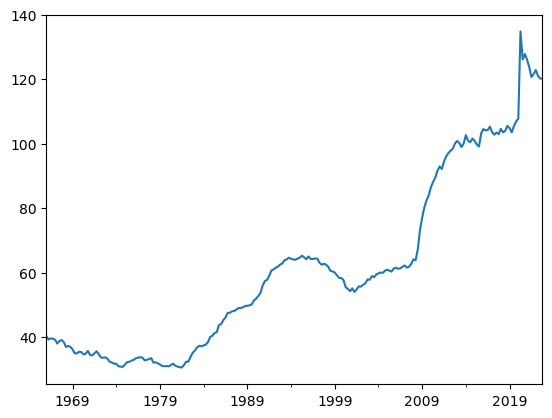

In [75]:
data['debt-to-GDP']['US'].plot()

In [78]:
data['debt-to-GDP']['EU'].plot()

KeyError: 'EU'

In [30]:
data['CPI']['US'] = fred.get_series('MEDCPIM158SFRBCLE')
data['CPI']['US'].index.min(), data['CPI']['US'].index.max()

(Timestamp('1983-01-01 00:00:00'), Timestamp('2023-03-01 00:00:00'))

In [32]:
sm.tsa.adfuller(data['CPI']['US'])

(-3.2699474541946105,
 0.0162764454883759,
 13,
 469,
 {'1%': -3.444370153876086,
  '5%': -2.867722323562515,
  '10%': -2.5700629410213627},
 1082.960588634998)

In [31]:
data['CPI']['EU'] = fred.get_series('EU28CPALTT01GYM')
data['CPI']['EU'].index.min(), data['CPI']['EU'].index.max()

(Timestamp('1997-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [34]:
sm.tsa.adfuller(data['CPI']['EU'].dropna())

(-2.1522251343947194,
 0.22403933598491993,
 12,
 217,
 {'1%': -3.460849270544952,
  '5%': -2.87495318813585,
  '10%': -2.5739190539191745},
 -36.20186736721132)

<AxesSubplot:>

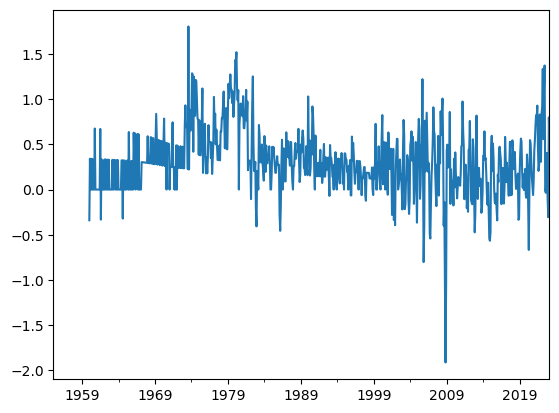

In [107]:
data['CPI']['US'].plot()

<AxesSubplot:>

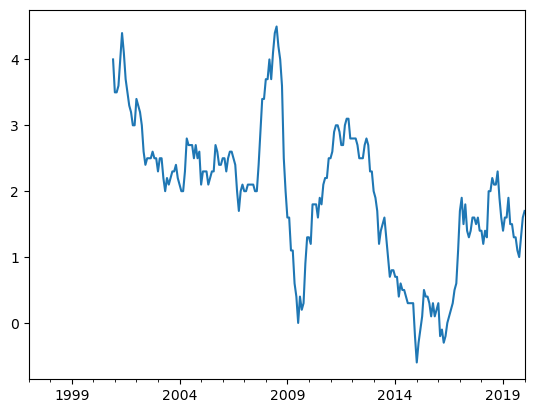

In [108]:
data['CPI']['EU'].plot()

In [38]:
data['IR']['US'] = fred.get_series('FEDFUNDS')

In [39]:
sm.tsa.adfuller(data['IR']['US'])

(-2.933487090547408,
 0.04159019039636975,
 17,
 807,
 {'1%': -3.4384791480370605,
  '5%': -2.865128114094396,
  '10%': -2.5686806329529874},
 931.1494586995293)

In [36]:
data['IR']['EU'] = fred.get_series('ECBDFR')

In [37]:
sm.tsa.adfuller(data['IR']['EU'])

(-0.6962731255782569,
 0.847712522029314,
 1,
 8882,
 {'1%': -3.431086454728276,
  '5%': -2.8618654646703425,
  '10%': -2.5669432398398557},
 -36977.98411334871)

<AxesSubplot:>

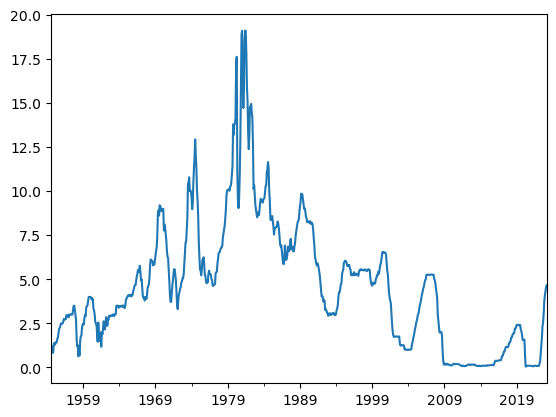

In [86]:
data['IR']['US'].plot()

<AxesSubplot:>

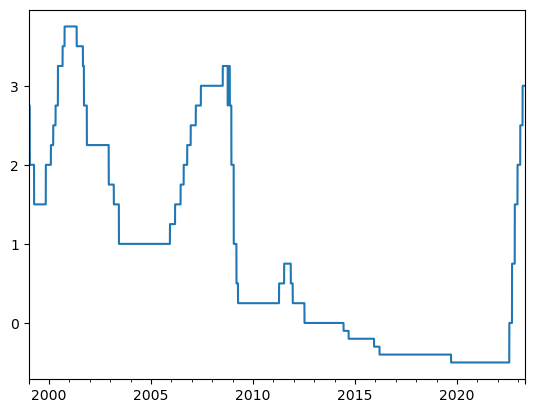

In [85]:
data['IR']['EU'].plot()

In [141]:
columns = []
to_concat = []
for sector, item in data.items():
    for country, series in item.items():
        columns.append(sector+"_"+country)
        to_concat.append(series)
        
df = pd.concat(to_concat,axis=1)
df.columns = columns

In [142]:
df

,CPI_US,CPI_EU,GDP_US,GDP_EU,IR_EU,IR_US,debt-to-GDP_US
1947-01-01,NaN,NaN,2034.450,NaN,NaN,NaN,NaN
1947-04-01,NaN,NaN,2029.024,NaN,NaN,NaN,NaN
1947-07-01,NaN,NaN,2024.834,NaN,NaN,NaN,NaN
1947-10-01,NaN,NaN,2056.508,NaN,NaN,NaN,NaN
1948-01-01,NaN,NaN,2087.442,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-04-23,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2023-04-24,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2023-04-25,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2023-04-26,NaN,NaN,NaN,NaN,3.0,NaN,NaN


<AxesSubplot:>

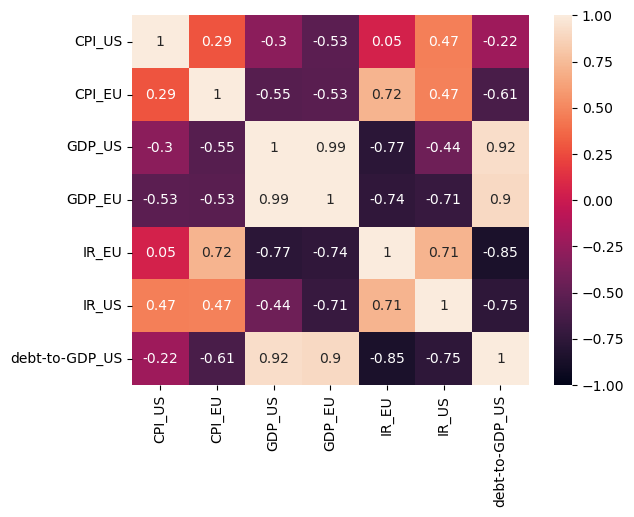

In [143]:
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

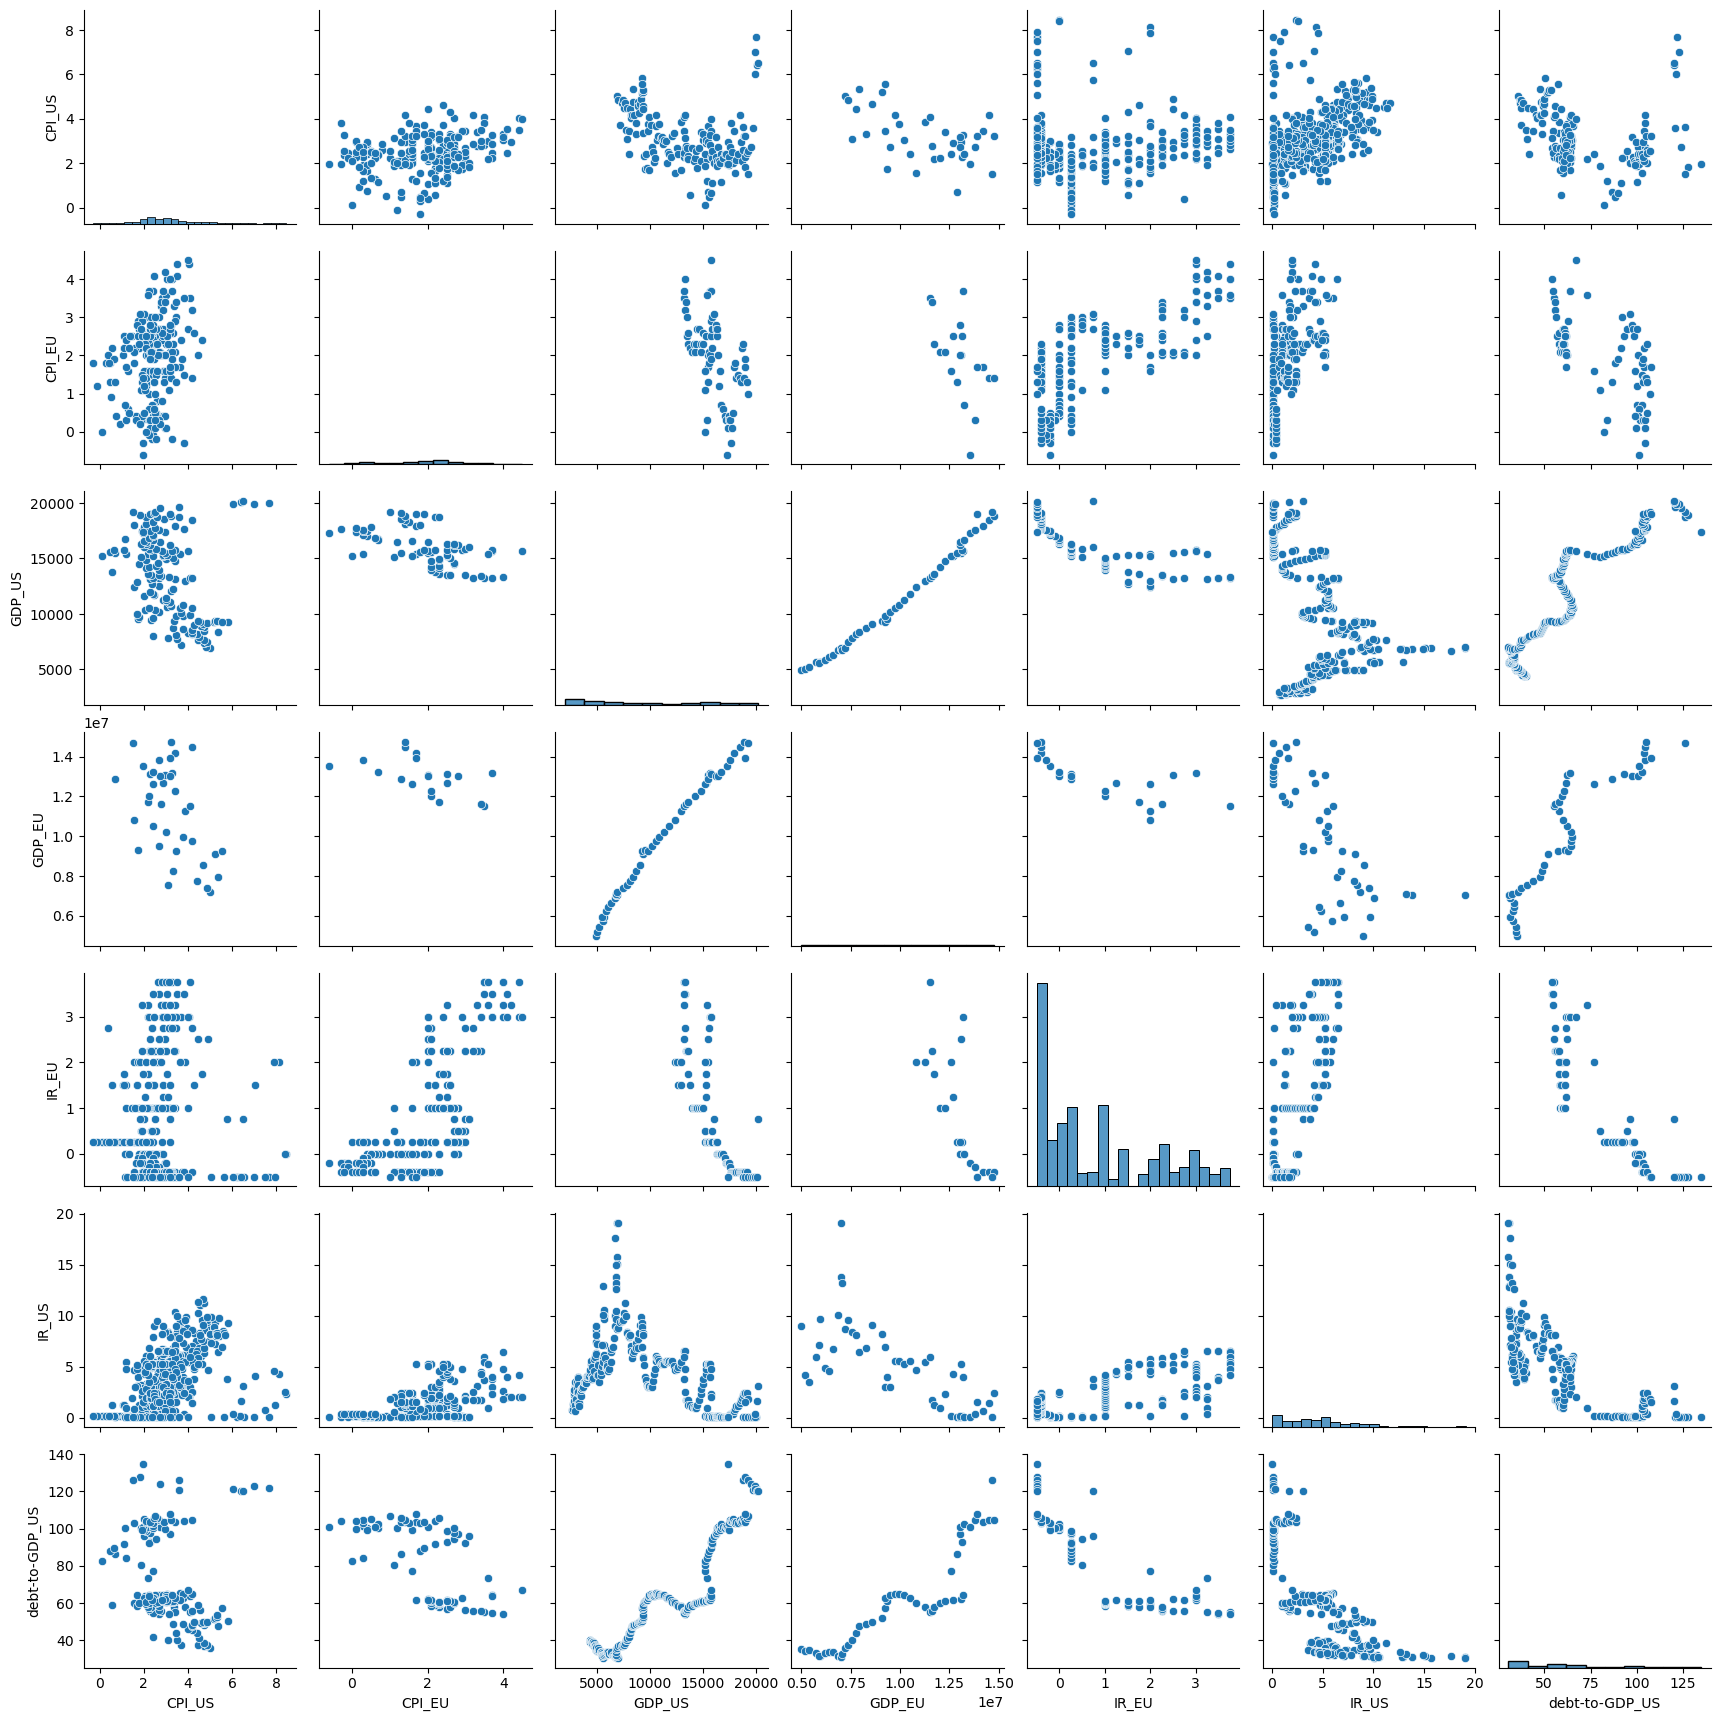

In [144]:
sns.pairplot(df)

In [145]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=df.ffill().index, y=df.ffill().IR_US), row=1, col=1)
fig.add_trace(go.Scatter(x=df.ffill().index, y=df.ffill().CPI_US), row=2, col=1)
fig.show()

In [146]:
fig = make_subplots(rows=3, cols=1)
fig.add_trace(go.Scatter(x=df.dropna().index, y=df.dropna().IR_EU, name="IR"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.dropna().index, y=df.dropna().CPI_EU, name="CPI"), row=2, col=1)
fig.add_trace(go.Scatter(x=df.dropna().index, y=df.dropna().GDP_EU.pct_change(), name="GDP"), row=3, col=1)
fig.show()

In [147]:
fig = px.scatter(df, x='CPI_EU', y='IR_EU')
fig.show()